#3.Coleta de dados

In [41]:
#Importando Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


In [3]:
# Carregando arquivo csv(banco de dados)
df = pd.read_csv('/content/Walmart.csv', sep=',')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Analise das informações das colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#4.Limpeza de dados

In [5]:
# Verificando se há valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Verificando se há valores duplicados
df.duplicated().sum()

0

As datas apresentam ano de 2010 à 2012 sendo interesante a comparação de anos

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,YearMonth
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,2010-05


Convertendo Fahrenheit para Celsius
* A conversão de Fahrenheit para Celsius se dá pela formula (°F − 32) × 5/9 = 0 °C

In [8]:
# criando uma função para a conversão
def converterFandC(F):
  C = (F - 32) * (5 / 9)
  
  return C 

In [9]:
df['Temperature'] = converterFandC(df['Temperature'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,YearMonth
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106,5,2010,2010-05
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106,12,2010,2010-12
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2,2010,2010-02
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2,2010,2010-02
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106,5,2010,2010-05


Conversão da temperatura de float para int

In [10]:
df['Temperature'] = df['Temperature'].astype(int)
df['Temperature'].head().to_frame()


,Temperature
0,5
1,3
2,4
3,8
4,8


#5.Exploração de dados

In [11]:
df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year','YearMonth']].tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,YearMonth
6430,45,2012-09-28,713173.95,0,18,3.997,192.013558,8.684,9,2012,2012-09
6431,45,2012-05-10,733455.07,0,18,3.985,192.170412,8.667,5,2012,2012-05
6432,45,2012-12-10,734464.36,0,12,4.000,192.327265,8.667,12,2012,2012-12
6433,45,2012-10-19,718125.53,0,13,3.969,192.330854,8.667,10,2012,2012-10
6434,45,2012-10-26,760281.43,0,14,3.882,192.308899,8.667,10,2012,2012-10


In [12]:
df.columns.values

array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'YearMonth'],
      dtype=object)

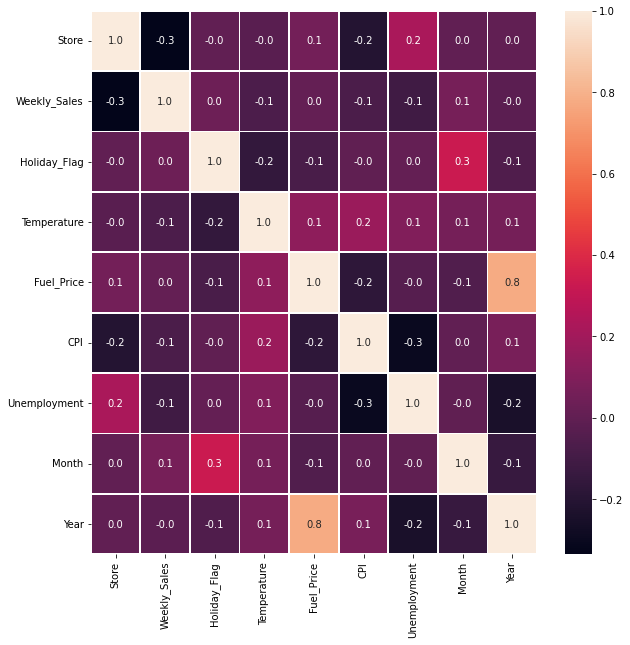

In [13]:
# Correlação das colunas 

colums = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']].corr().dropna()
plt.figure(figsize=[10,10])
plot = sns.heatmap(colums, annot = True, fmt=".1f", linewidths=1 )
plot


Para saber quais lojas tiveram os maiores faturamentos, é necessário realizar um agrupamento por loja e somar todos os faturamentos semanais de cada loja.

In [14]:
# Agrupando o df por lojas e somando os seus respectivos faturamentos
lojas_faturamento_TT = df.groupby(df['Store'], as_index = False)['Weekly_Sales'].sum().astype(int)

# As 5 lojas com maiores faturamentos
lojas_faturamento_TT.sort_values(by = 'Weekly_Sales',ascending=False).head(5)


,Store,Weekly_Sales
19,20,301397792
3,4,299543953
13,14,288999911
12,13,286517703
1,2,275382440


Com isso, percebe-se que as lojas com maiores faturamentos foram:

(Ordem decrescente)
1. Loja 20 - 301 milhões de dólares
2. Loja 4 - 299 milhões de dólares
3. Loja 14 - 288 milhões de dólares
4. Loja 13 - 286 milhões de dólares
5. Loja 2 - 275 milhões de dólares





In [15]:
# Histograma, utilizando plotly.express para uma visualização detalhada do faturamento total de cada loja

graf_lojas_faturamento_TT = px.histogram(lojas_faturamento_TT, x='Weekly_Sales', color ='Store')
graf_lojas_faturamento_TT.show()

Através desse histograma, é visível que as lojas 20, 2, 4, 10, 13, 14 e 27 estão com seus faturamentos totais acima de $250 milhões de dólares, coonfirmando a análise feita antes 

Nessa análise abaixo será utilizado um gráfico de barras para uma visualização mais geral das lojas x faturamento total

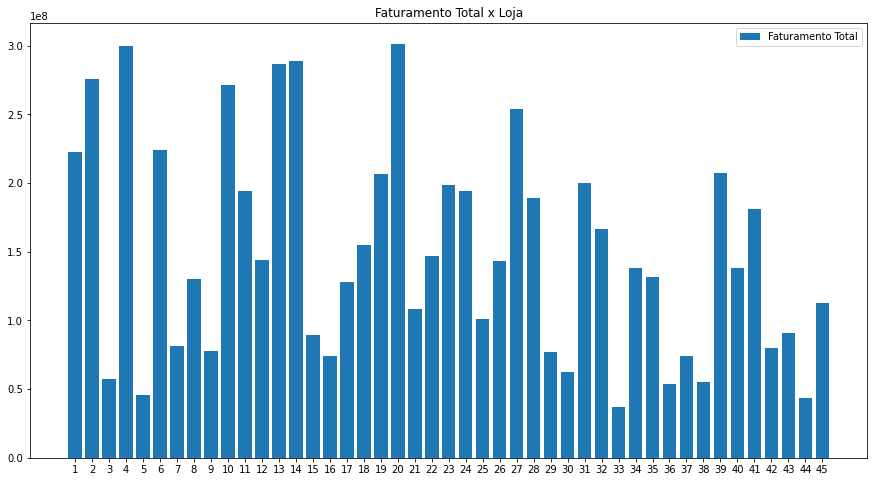

In [16]:
# Gráfico de barras para visualização  do faturamento total x loja

plt.figure(figsize=[15,8])
plt.bar(lojas_faturamento_TT['Store'], lojas_faturamento_TT['Weekly_Sales'], label='Faturamento Total')
plt.xticks(lojas_faturamento_TT['Store'])
plt.legend()
plt.title('Faturamento Total x Loja')
plt.show()

Análise mensal das lojas, em todo esse período

In [17]:
# Agrupamento por Loja e ano/mes , somando o faturamento e feriados(no mês), e fazendo a média das demais
analise_mensal = df.groupby(['Store','YearMonth'], as_index=False).agg({'Weekly_Sales':'sum',
                                                                       'Temperature':'mean',
                                                                       'Fuel_Price':'mean',
                                                                       'CPI':'mean',
                                                                       'Unemployment':'mean',
                                                                       'Holiday_Flag':'sum'})

analise_mensal.rename(columns={'Weekly_Sales':'Venda_mensal'}, inplace=True)
analise_mensal


,Store,YearMonth,Venda_mensal,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag
0,1,2010-01,1453329.50,22.000000,2.603000,211.671989,7.838000,0
1,1,2010-02,6109082.18,13.750000,2.615750,211.163192,7.951750,0
2,1,2010-03,5965143.02,14.500000,2.684250,211.343030,7.959250,0
3,1,2010-04,5897939.82,20.750000,2.772000,210.623449,7.808000,0
4,1,2010-05,9076140.38,16.666667,2.720833,211.042363,7.912333,0
...,...,...,...,...,...,...,...,...
1615,45,2012-08,2970160.06,21.500000,3.799250,191.262548,8.654750,0
1616,45,2012-09,2915467.29,15.500000,3.957750,191.476527,8.619000,0
1617,45,2012-10,3015101.40,13.500000,3.803250,191.377493,8.610500,1
1618,45,2012-11,770487.37,16.000000,3.889000,190.976417,8.567000,0


In [20]:

fig_analise_mensal = px.line(analise_mensal, x="YearMonth", y="Venda_mensal", color='Store')
fig_analise_mensal.update_layout(title='Faturamento mensal x Meses/ano',
                  xaxis_title='Período mensal',yaxis_title='Faturamento mensal')
fig_analise_mensal.show()

Através desse gráfico, percebe-se que a loja 14, inicialmente era a que mais faturava, mas a partir de Novembro de 2010 o faturamento dela decaiu, dando lugar às lojas 20 e 4, que com o passar do tempo, foram as que mais faturaram

In [21]:
analise_5melhores_mensal = analise_mensal.loc[ (analise_mensal['Store']==2) |
                                               (analise_mensal['Store']==4) |
                                               (analise_mensal['Store']==13) |
                                               (analise_mensal['Store']==14) |
                                               (analise_mensal['Store']==20) ]
                                               
analise_5melhores_mensal.head()

,Store,YearMonth,Venda_mensal,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag
36,2,2010-01,1827440.43,20.000000,2.603000,211.329874,8.163000,0
37,2,2010-02,8059677.17,14.000000,2.615750,210.820344,8.236750,0
38,2,2010-03,7616658.05,14.500000,2.684250,211.001044,8.227500,0
39,2,2010-04,7601939.09,21.000000,2.772000,210.283453,8.200000,0
40,2,2010-05,11801867.35,16.333333,2.720833,210.700566,8.235167,0


Gráfico das 5 lojas que obtiveram os maiores faturamentos mensais em todo esse período

In [23]:
fig_analise_5melhores_mensal = px.line(analise_5melhores_mensal, x="YearMonth", y="Venda_mensal", color='Store')
fig_analise_5melhores_mensal.update_layout(title=' 5 melhores lojas - Faturamento mensal x Meses/ano',
                  xaxis_title='Período mensal',yaxis_title='Faturamento mensal')
fig_analise_5melhores_mensal.show()

Através desse gráfico acima, fica mais nítido que as lojas 20 e 4 tiveram um faturamento maior entre as melhores.

Sabe-se que feriados possuem, de modo geral, influência nas vendas dos comércios. Através do gráfico abaixo, será analisado se os feriados influenciam nos faturamentos mensais das lojas

In [24]:
# Agrupamento das vendas mensais por n° de feriados no mês
feriado_vendas = analise_mensal.groupby('Holiday_Flag')['Venda_mensal'].sum().reset_index()
feriado_vendas

,Holiday_Flag,Venda_mensal
0,0,4.937210e+09
1,1,1.222967e+09
2,2,5.770419e+08


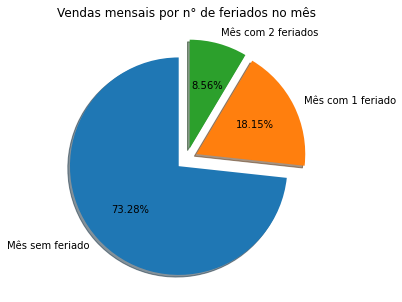

In [25]:
# Gráfico para análise das vendas mensais por n° de feriados no mês
plt.figure(figsize=[5,5])
plt.pie(feriado_vendas['Venda_mensal'],labels= ['Mês sem feriado','Mês com 1 feriado', 'Mês com 2 feriados'],
        autopct='%1.2f%%', startangle=90,explode=[0.1,0.1,0.1],shadow=True)
plt.title('Vendas mensais por n° de feriados no mês')
plt.show()

Percebe-se que, quanto mais feriados no mês, menor será o faturamento das lojas

### Análise a partir das semanas

Melhorando a compreensão do comportamento de faturamento ao longo das semanas, para isso é necessário uma análise com uma coluna ainda não existente, ['Week_Year'] corresponde a essa coluna a ser criada

In [83]:
# Seperando colunas de dados interessantes para a análise semanal

# Ordenando por maiores faturamentos extraídos do df principal
df_semana = df.sort_values(by = 'Weekly_Sales',ascending = False)
df_semana = df_semana[['Store','Weekly_Sales','Holiday_Flag','YearMonth']].head(50)

# Criando coluna semana
df_semana['Week_Year'] = df['Date'].dt.strftime('%U')
df_semana 


,Store,Weekly_Sales,Holiday_Flag,YearMonth,Week_Year
1905,14,3818686.45,0,2010-12,51
2763,20,3766687.43,0,2010-12,51
1333,10,3749057.69,0,2010-12,51
527,4,3676388.98,0,2011-12,51
1762,13,3595903.20,0,2010-12,51
1814,13,3556766.03,0,2011-12,51
2815,20,3555371.03,0,2011-12,51
475,4,3526713.39,0,2010-12,51
1385,10,3487986.89,0,2011-12,51
189,2,3436007.68,0,2010-12,51


Contando valores encontrados, para análisar top 50 faturamentos por semana

In [84]:
# Count de faturamentos por semana
df_semana['Week_Year'].value_counts()


51    20
47    13
50    11
41     2
37     2
18     1
23     1
Name: Week_Year, dtype: int64

Plotagem dos maiores faturamentos encontrados:

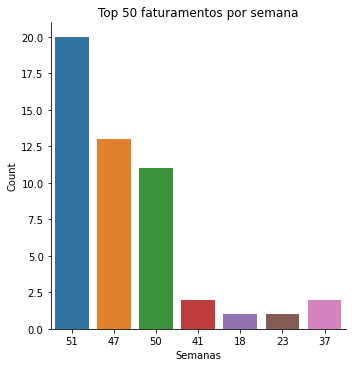

In [171]:
#Plot de faturamentos por semana
sns.catplot(x='Week_Year', 
            kind='count', data=df_semana)

plt.title('Top 50 faturamentos por semana')
plt.xlabel("Semanas") 
plt.ylabel("Count") ;

## Comportamento das lojas 


Encontrando top 5 de média de faturamentos

In [97]:
# Media de faturamento
media_faturamento = df.groupby((df['Store']), as_index = False)['Weekly_Sales'].mean().astype(int)

# Maiores medias de faturamento 
media_faturamento = media_faturamento.sort_values(by = 'Weekly_Sales',ascending=False).head(5)
media_faturamento

,Store,Weekly_Sales
19,20,2107676
3,4,2094712
13,14,2020978
12,13,2003620
1,2,1925751


Análise da melhor loja encontrada

In [141]:

melhor_loja = analise_mensal.loc[ (analise_mensal['Store']==20)]
melhor_loja.head()

,Store,YearMonth,Venda_mensal,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag
684,20,2010-01,1933719.21,16.00,2.707000,204.885097,7.484000,0
685,20,2010-02,8608815.70,7.00,2.791000,204.346382,7.939250,0
686,20,2010-03,8384203.96,10.75,2.864750,204.540814,7.846250,0
687,20,2010-04,7987319.57,14.25,2.892250,203.868991,7.856000,0
688,20,2010-05,12697859.30,8.50,2.886167,204.255529,7.904333,0


In [164]:
melhor_loja['Venda_mensal'].max()

14693466.41

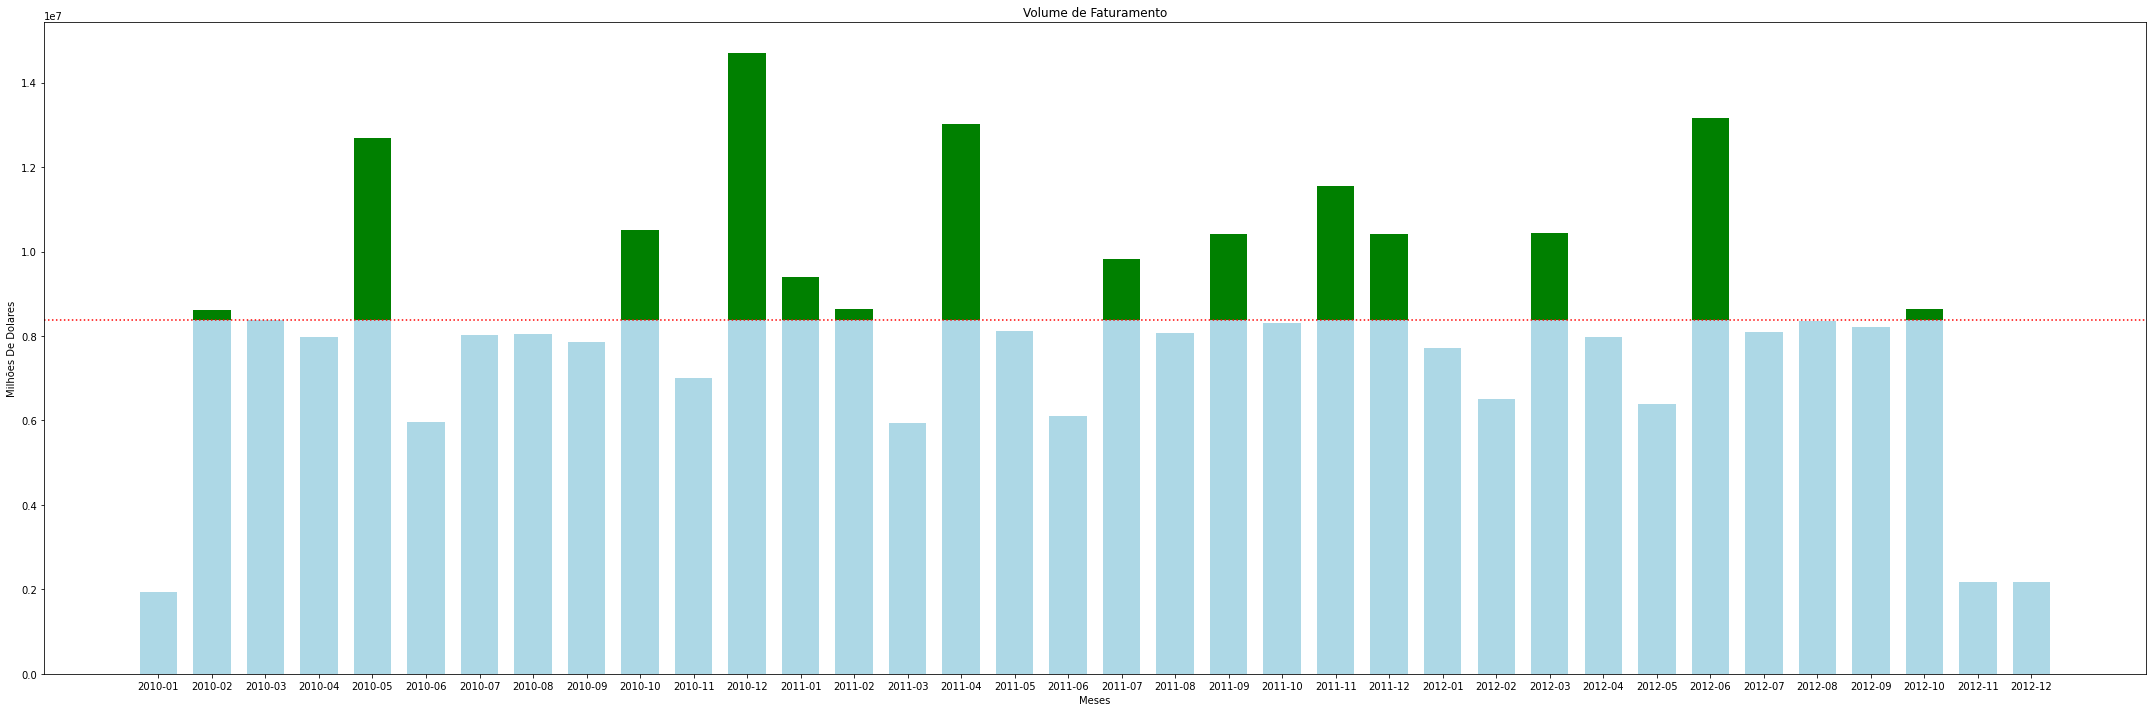

In [168]:
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams["figure.autolayout"] = True
linha_media = melhor_loja['Venda_mensal'].mean()
values = melhor_loja['Venda_mensal'].values
x = melhor_loja['YearMonth']

a_threshold = np.maximum(values - linha_media, 0)
b_threshold = np.minimum(values, linha_media)

fig, ax = plt.subplots()
ax.bar(x, b_threshold, 0.70, color='lightblue')
ax.bar(x, a_threshold, 0.70, color="green", bottom=b_threshold)


plt.axhline(linha_media, color='red', ls='dotted')
plt.title('Volume de Faturamento')
plt.xlabel('Meses')
plt.ylabel('Milhões De Dolares')

plt.show()

## Análise de temperatura x vendas mensal (Martin)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


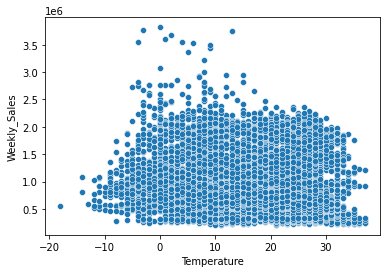

In [ ]:
#verificando a correlação entre Temperature e Weekly_sales
fig= plt.figure()
sns.scatterplot(df['Temperature'],df['Weekly_Sales'], x='Temperature')
plt.show()

In [26]:
#correlação entre Temperatura e Weekly_Sales
np.corrcoef(df['Temperature'], df['Weekly_Sales']) [0,1]

-0.06487556211529537

Nota-se que a Temperatura tem uma correlação negativa muito baixa com o valor de vendas semanais

In [27]:

#média de temperatura mensal por loja
temp_media_loja = df.groupby(['Store','YearMonth'], as_index=False )['Temperature'].mean().reset_index()
temp_media_loja

#total de vendas mensal e temperatura média por loja
vendas_mensal_loja = df.groupby(['Store','YearMonth'], as_index=False )['Weekly_Sales'].sum()
vendas_mensal_loja.rename(columns={'Weekly_Sales':'Venda_mensal'}, inplace=True)
vendas_mensal_loja['Temp_media_mensal'] = temp_media_loja['Temperature'].round(1)
vendas_mensal_loja

,Store,YearMonth,Venda_mensal,Temp_media_mensal
0,1,2010-01,1453329.50,22.0
1,1,2010-02,6109082.18,13.8
2,1,2010-03,5965143.02,14.5
3,1,2010-04,5897939.82,20.8
4,1,2010-05,9076140.38,16.7
...,...,...,...,...
1615,45,2012-08,2970160.06,21.5
1616,45,2012-09,2915467.29,15.5
1617,45,2012-10,3015101.40,13.5
1618,45,2012-11,770487.37,16.0


In [28]:
#Análise de correlação de venda mensal pela temperatura média
np.corrcoef(vendas_mensal_loja['Venda_mensal'],vendas_mensal_loja['Temp_media_mensal']) [0,1]

-0.156623092181947

Ao agrupar as vendas em meses e tirar a média da temperatura mensal, vemos que existe uma correlação ainda fraca , porém maior, entre temperatura e total de vendas

In [29]:
#Correlacionar Temperatura com Vendas por mês
temp_media_mensal = df.groupby(['YearMonth'])['Temperature'].mean().round().reset_index()
temp_media_mensal

#Média de vendas mensal
venda_media_mensal = vendas_mensal_loja.groupby(['YearMonth'])['Venda_mensal'].mean().round(1).reset_index()

tabela_comparativa = venda_media_mensal
tabela_comparativa['Temperatura Média'] = temp_media_mensal['Temperature']
tabela_comparativa.set_index('YearMonth')
tabela_comparativa.head()

,YearMonth,Venda_mensal,Temperatura Média
0,2010-01,938663.9,21.0
1,2010-02,4257486.2,11.0
2,2010-03,4138360.5,12.0
3,2010-04,4084706.4,16.0
4,2010-05,6235819.6,12.0


In [ ]:
#correlação entre temp média e venda mensal da loja
np.corrcoef(tabela_comparativa['Venda_mensal'],tabela_comparativa['Temperatura Média']) [0,1]

-0.3187412532100636

Ao agrupar 

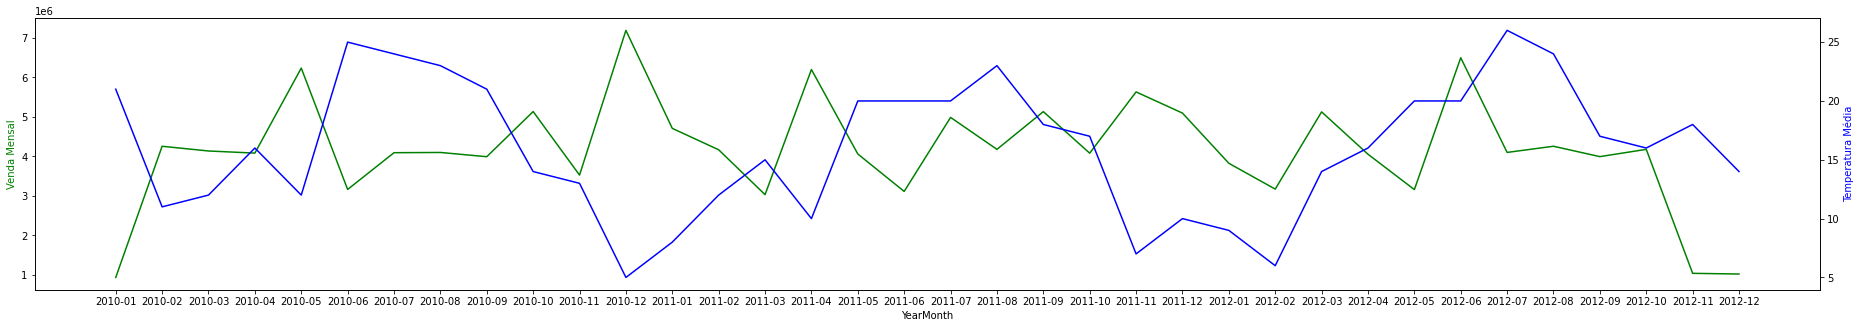

In [30]:
x = tabela_comparativa['YearMonth']
y1 = tabela_comparativa['Venda_mensal']
y2 = tabela_comparativa['Temperatura Média']


fig, ax1 = plt.subplots(figsize=[32,5])
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('YearMonth')
ax1.set_ylabel('Venda Mensal', color='g')
ax2.set_ylabel('Temperatura Média', color='b')

plt.show()